In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
import seaborn as sns
import os
import pandas as pd

print(os.getcwd())

sns.set_theme(
    context="paper",
    style="white",
    palette="icefire",
)

c:\Users\matth\git\Growing Networks\N3\nbs


In [7]:
data = pd.read_csv("../output/BESSEL/SEED_0/base_losses.csv")

for i in range(1, 50):
  tmpdata = pd.read_csv(f"../output/BESSEL/SEED_{i}/base_losses.csv")
  data = pd.concat([data, tmpdata], ignore_index=True)

print(data.columns)

# Using numpy because yes
data = data.to_numpy()

print(data.shape)
print(data[0])

Index(['Seed', 'Network_Type', 'N_max', 'Epoch', 'Base_Loss', 'Size_Loss',
       'Hidden_Layer_Size', 'Learning_Rate', 'Num_Epochs', 'Size_Influence'],
      dtype='object')
(40000, 10)
[0 'Bessel_Grown' 10 0 0.5339405536651611 0.0 '[1.]' 0.001 5000 0.01]


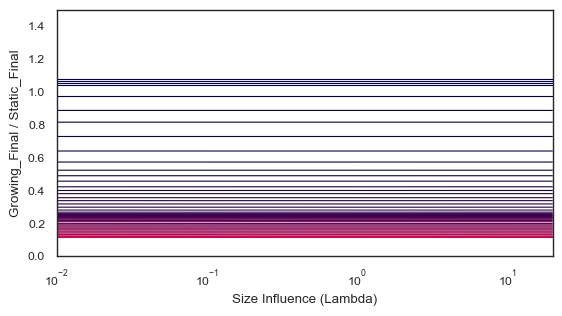

In [8]:
from matplotlib.collections import LineCollection
# Outdated scatter code::

# for i in range(50):
#   print(final_losses[i])

# plt.xscale("log")
# plt.yscale("log")

# plt.scatter(x=growing[:, 9], y=growing[:, 4], cmap="jet")
# plt.scatter(x=grown[:, 9], y=grown[:, 4], cmap="jet", marker="x")
# plt.show

fig, ax = plt.subplots(figsize=(6.4, 3.2))
ratios = []

# Iterate through the specified epochs and plot loss ratio vs. lambda for all of them:
desired_epochs= np.linspace(100, 4900, num=49)
# Expected contents are [100, 200, 300, ... , 4900]

for _Epoch in desired_epochs:
  final_losses = data[data[:, 3] ==  _Epoch]

  growing = final_losses[final_losses[:, 1] == "Bessel_Growing"]
  grown = final_losses[final_losses[:, 1] == "Bessel_Grown"]

  growing_finals_avgs = []
  static_finals_avgs = []

  lambdas = [0.01, 0.02, 0.1, 0.2, 1.0, 2.0, 10.0, 20.0]

  for size_loss in lambdas:
    growing_finals_avgs.append(np.average(growing[growing[:, 9] == size_loss][:, 4], weights=None))
    static_finals_avgs.append(np.average(grown[grown[:, 9] == size_loss][:, 4], weights=None))

  current_ratio = []

  for i in range(len(lambdas)):
    current_ratio.append([lambdas[i], growing_finals_avgs[i]/static_finals_avgs[i]])
  #   print(f"grow={growing_finals_avgs[i]},static={static_finals_avgs[i]},ratio={ratio[i]}")

  ratios.append(current_ratio)

colors = []

max_epoch = np.max(desired_epochs)
for epoch in desired_epochs:
  colors.append( ((epoch/max_epoch)**2 * 0.9, 0.0, 0.3) )

ax.add_collection(LineCollection(ratios, linewidths=0.8, colors=colors))

plt.xscale("log")
plt.xlabel("Size Influence (Lambda)")
plt.ylabel("Growing_Final / Static_Final")

plt.xlim((0.01,20.0))
plt.ylim((0,1.5))

plt.show()

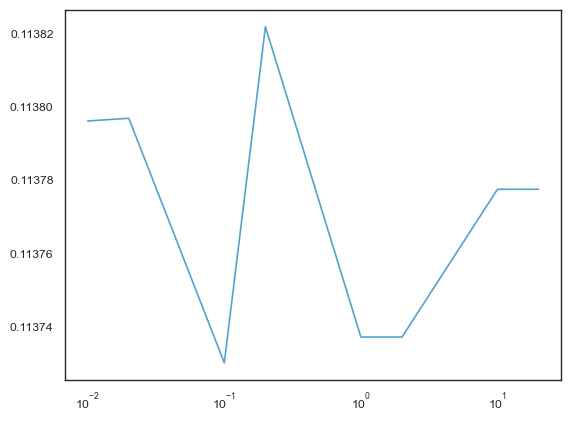

In [9]:
plt.clf()

final_losses = data[data[:, 3] ==  4900]

growing = final_losses[final_losses[:, 1] == "Bessel_Growing"]
grown = final_losses[final_losses[:, 1] == "Bessel_Grown"]

growing_finals_avgs = []
static_finals_avgs = []

lambdas = [0.01, 0.02, 0.1, 0.2, 1.0, 2.0, 10.0, 20.0]

for size_loss in lambdas:
  growing_finals_avgs.append(np.average(growing[growing[:, 9] == size_loss][:, 4], weights=None))
  static_finals_avgs.append(np.average(grown[grown[:, 9] == size_loss][:, 4], weights=None))

current_ratio = []

for i in range(len(lambdas)):
  current_ratio.append(growing_finals_avgs[i]/static_finals_avgs[i])
  #   print(f"grow={growing_finals_avgs[i]},static={static_finals_avgs[i]},ratio={ratio[i]}")

plt.plot(lambdas, current_ratio)
plt.xscale("log")

plt.show()

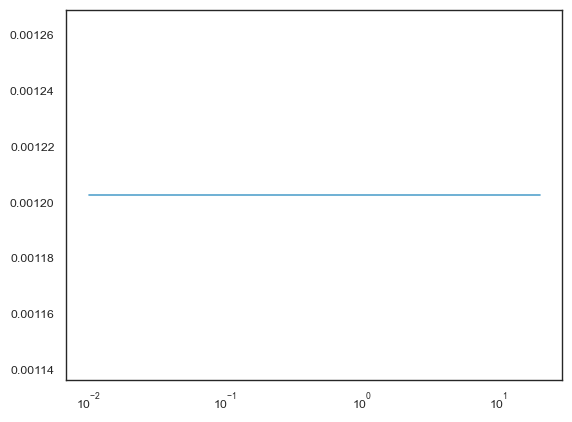

In [ ]:
plt.plot(lambdas, static_finals_avgs, label="Fixed")
plt.xscale("log")

In [11]:
# Clean the control signal into a float
print(type(data[0][6]))

for row in data:
  row[6] = float(row[6][1:-1])

print(type(data[0][6]))
print(data[55][6])

<class 'float'>


TypeError: 'float' object is not subscriptable

<Figure size 640x480 with 0 Axes>

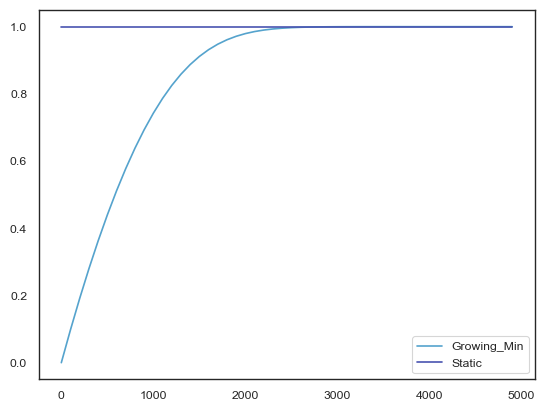

In [16]:
plt.clf()

mean_static_control = []
mean_growing_control_min = []
mean_growing_control_max = []

# Generate [0, 100, 200, 300, ... , 4900]
epochs = np.linspace(0, 4900, 50)

g = data[data[:, 1] == "Bessel_Growing"]
s = data[data[:, 1] == "Bessel_Grown"]

g_min = g[g[:, 9] == 0.01]
g_max = g[g[:, 9] == 20.0]

for e in epochs:
  # Calculate the average at epoch 'e' for the growing and static networks
  mean_growing_control_min.append(np.average(g_min[g_min[:, 3] == e][:, 6]))
  mean_growing_control_max.append(np.average(g_max[g_max[:, 3] == e][:, 6]))

  mean_static_control.append(np.average(s[s[:, 3] == e][:, 6]))

  # [0.01, 20.0]

plt.figure()

plt.plot(epochs, mean_growing_control_min, label="Growing_Min")
plt.plot(epochs, mean_growing_control_max, label="Growing_Max")
plt.plot(epochs, mean_static_control, label="Static")

plt.legend()
plt.show()